### Importing Required Libraries

In [55]:
import pandas as pd  # type: ignore
import seaborn as sns  # type: ignore
from sklearn.preprocessing import StandardScaler  # type: ignore 
import matplotlib.pyplot as plt  # type: ignore     

import numpy as np  # type: ignore      
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.ensemble import IsolationForest # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore
from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.metrics import make_scorer, f1_score  , roc_auc_score# type: ignore


In [56]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
data.shape

(284807, 31)

In [58]:
data = data.sample(frac=0.15)
data.shape

(42721, 31)

In [59]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
(fraud.shape, valid.shape)

((76, 31), (42645, 31))

<Axes: >

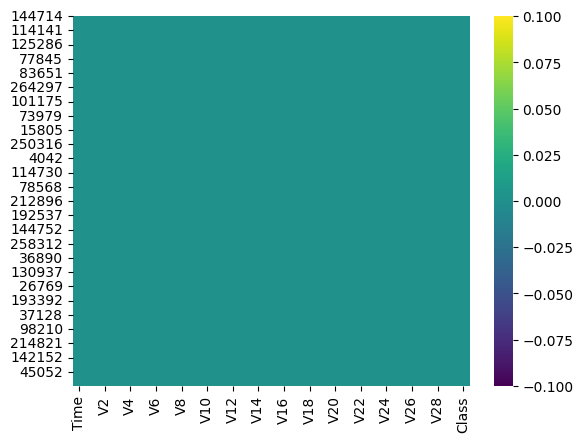

In [60]:
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
# no missing data

In [61]:
data.describe()
# the  amount  feature is not scaled
# the  time  feature is not  important


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,...,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000
mean,95166.034175,0.000358,-0.016818,-0.007623,0.006226,-0.010451,0.006870,0.002880,0.010979,-0.007934,...,0.002148,0.005345,0.000912,-0.003642,-0.004852,0.000515,-0.000130,0.001539,90.255003,0.001779
std,47427.430730,2.011297,1.675110,1.573647,1.432230,1.495291,1.365196,1.375382,1.204518,1.099883,...,0.734405,0.731089,0.605884,0.606146,0.520778,0.479502,0.441238,0.349569,276.379059,0.042141
min,1.000000,-40.042537,-50.383269,-48.325589,-5.263068,-113.743307,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-20.034848,-2.814898,-4.848151,-2.241620,-22.565679,-15.430084,0.000000,0.000000
25%,54537.000000,-0.907427,-0.613486,-0.890823,-0.853045,-0.704675,-0.765406,-0.553805,-0.204738,-0.656153,...,-0.227683,-0.541168,-0.160176,-0.356126,-0.321490,-0.323472,-0.069800,-0.052989,5.490000,0.000000
50%,85182.000000,0.023667,0.058964,0.170036,-0.024260,-0.058626,-0.267106,0.036987,0.026241,-0.058842,...,-0.028861,0.008753,-0.010356,0.040491,0.012127,-0.051999,0.002829,0.011627,22.000000,0.000000
75%,139688.000000,1.317217,0.793730,1.027862,0.750341,0.612624,0.407970,0.570148,0.330047,0.589435,...,0.187351,0.535897,0.146717,0.435263,0.343751,0.237863,0.090822,0.078245,78.930000,0.000000
max,172787.000000,2.454930,22.057729,9.382558,15.304184,34.099309,73.301626,120.589494,19.587773,15.594995,...,27.202839,8.361985,22.528412,4.584549,5.525093,3.517346,31.612198,15.870474,25691.160000,1.000000


In [62]:
scalar = StandardScaler()
data['Amount'] = scalar.fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop('Time', axis=1, inplace=True)
duplicates_rows = data.duplicated().sum() # it returns the number of duplicates rowws
if duplicates_rows  > 0:
   data.drop_duplicates(inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144714,-0.369642,0.810406,1.414844,-0.112502,0.335780,-0.199994,0.645299,0.061202,-0.333954,-0.141789,...,-0.243258,-0.534598,-0.002997,-0.065871,-0.325162,0.059582,0.083865,-0.139693,-0.294038,0
20859,-0.817764,0.815879,1.516400,0.088269,0.787500,0.327916,0.848045,0.189183,-0.182313,-0.888293,...,-0.106449,-0.254996,-0.420703,-0.799198,0.759032,-0.341445,0.041850,0.048003,-0.253115,0
133971,1.288715,0.278824,-0.094444,0.728437,0.508862,0.405845,0.004618,0.027684,0.099855,-0.061220,...,-0.131477,-0.289510,-0.150354,-1.326635,0.640986,-0.346593,0.041897,0.009873,-0.315892,0
256036,-0.151269,0.319771,-1.209519,-0.063316,1.702197,4.291593,-0.591227,1.627079,0.177560,-1.093822,...,0.195231,0.236273,0.519188,0.530703,-0.772943,-0.780416,0.003868,-0.006347,0.158281,0
199954,0.034006,0.922148,0.320239,-0.588479,0.509390,-1.121632,1.061309,-0.261381,-0.190169,-0.436596,...,-0.248098,-0.491085,0.059348,0.066118,-0.457325,0.134528,0.253374,0.099857,-0.320090,0


Class
0    42225
1       75
Name: count, dtype: int64


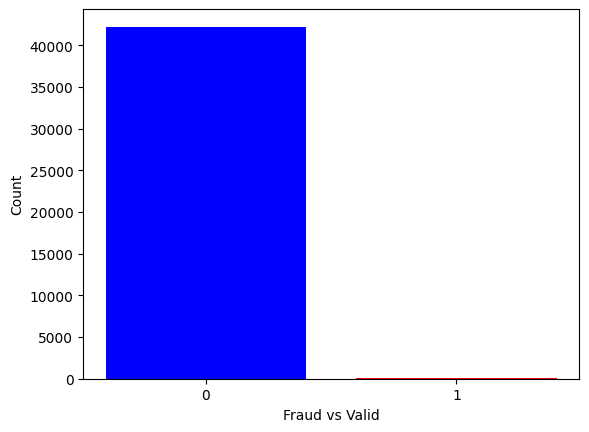

In [63]:
class_counts = data['Class'].value_counts()

print(class_counts)

plt.bar(class_counts.index.astype(str), class_counts.values, color=['blue' , 'red']) 

plt.xlabel('Fraud vs Valid')
plt.ylabel('Count')

plt.show()

In [64]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
(fraud.shape, normal.shape)   

((75, 30), (42225, 30))

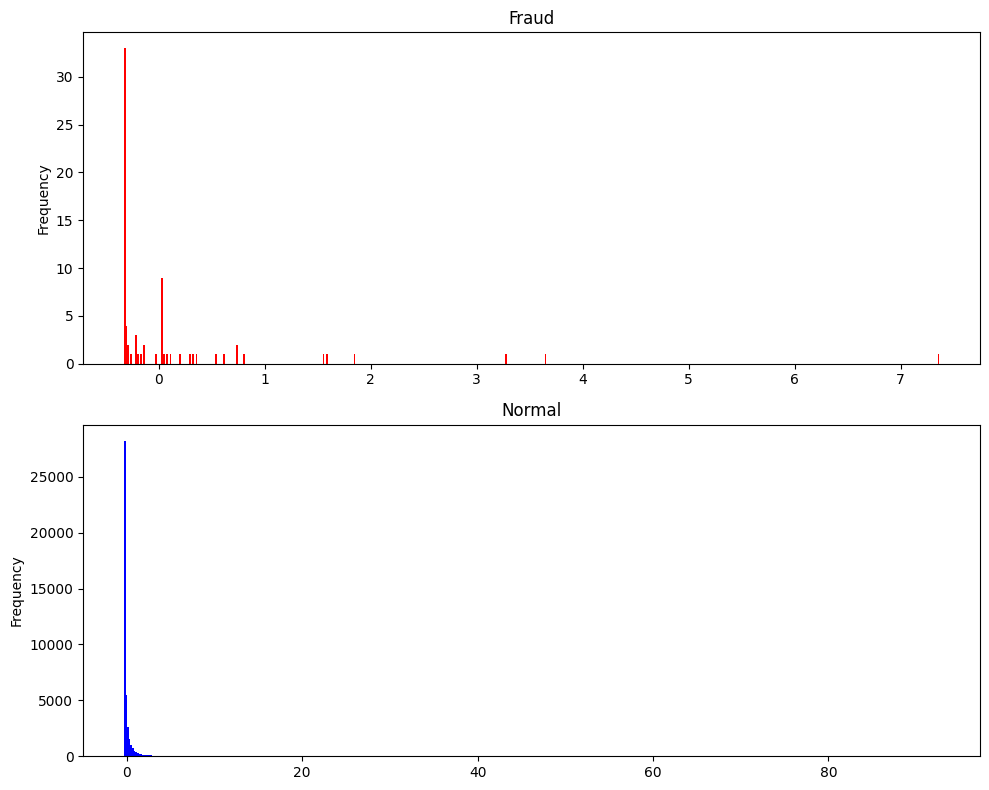

In [65]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  

fraud.Amount.plot.hist(title='Fraud', bins=500, color='red', ax=axes[0])
normal.Amount.plot.hist(title='Normal', bins=500, color='blue', ax=axes[1])
plt.tight_layout()  
plt.show()

In [66]:
X = data.drop('Class', axis=1)
y = data['Class']
X_tmp, X_sim, y_tmp, y_sim = train_test_split(X, y, test_size=0.1)
X_train , X_cv, y_train, y_cv = train_test_split(X_tmp, y_tmp, test_size=0.2)
(X_train.shape, X_cv.shape, X_sim.shape)
# X_test.to_csv('data/simulation_data.csv', index=False)



((30456, 29), (7614, 29), (4230, 29))

In [67]:
contamination = len(fraud) / len(data)
classifier = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05,max_features=1.0, bootstrap=False, n_jobs=-1,)
classifier.fit(X_train)
y_cv_pred = classifier.predict(X_cv)
contamination

0.0017730496453900709

In [68]:
y_cv_pred = np.where(y_cv_pred == -1, 1, 0) # 1 for fraud and 0 for normal np.where(condition, value_if_true, value_if_false)
y_cv_pred = pd.Series(y_cv_pred, index=y_cv.index)  
error = (y_cv_pred != y_cv).sum()
print("confusion matrix")
print(confusion_matrix(y_cv, y_cv_pred))
print("classification report")
print(classification_report(y_cv, y_cv_pred))

print(f"f1_score: {f1_score(y_cv, y_cv_pred)}")
print(f"error: {error}")
print(f"roc_auc_score: {roc_auc_score(y_cv, y_cv_pred)}")

confusion matrix
[[7214  387]
 [   2   11]]
classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7601
           1       0.03      0.85      0.05        13

    accuracy                           0.95      7614
   macro avg       0.51      0.90      0.51      7614
weighted avg       1.00      0.95      0.97      7614

f1_score: 0.0535279805352798
error: 389
roc_auc_score: 0.8976197463896451


In [69]:
param_grid = {
    'contamination': [0.001 ,0.01, 0.05, 0.1], 
}

iso_forest = IsolationForest(random_state=42)
scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=iso_forest, 
                           param_grid=param_grid, 
                           scoring='f1_micro', 
                           cv=5,   
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'contamination': 0.001}
Best Score: 0.0014775359876195928


In [70]:
data_sim = pd.concat([X_sim, y_sim], axis=1)

fraudy = data_sim[data_sim['Class'] == 1]
normaly = data_sim[data_sim['Class'] == 0]

num_normal = int(7 * fraudy.shape[0])  


normaly_sampled = normaly.sample(n=num_normal)

combined_data = pd.concat([fraudy, normaly_sampled], axis=0)

combined_data = combined_data.sample(frac=1).reset_index(drop=True)


print(f"Fraudulent samples shape: {fraudy.shape}")
print(f"Normal samples shape: {normaly_sampled.shape}")
print(f"Combined dataset shape: {combined_data.shape}")

Fraudulent samples shape: (12, 30)
Normal samples shape: (84, 30)
Combined dataset shape: (96, 30)


In [71]:
# test = fraudy.sample()
# yhat = classifier.predict(test.drop('Class', axis=1))
# yhat = np.where(yhat == -1, 1, 0)
# yhat = pd.Series(yhat, index=test.index)
# print(F"hat : {yhat}")        
# print(F"test : {test['Class']}")

# test2 = normaly.sample()
# yhat2 = classifier.predict(test2.drop('Class', axis=1))
# yhat2 = np.where(yhat2 == -1, 1, 0)
# yhat2 = pd.Series(yhat2, index=test2.index)
# print(F"hat : {yhat2}")
# print(F"test : {test2['Class']}")

yhat = classifier.predict(combined_data.drop('Class', axis=1))
yhat = np.where(yhat == -1, 1, 0)
yhat = pd.Series(yhat, index=combined_data.index)

print("error "+ str((yhat != combined_data['Class']).sum()))
# combined_data.shape




error 7


In [72]:
import pickle
# combined_data.drop('Class', axis=1, inplace=True) 
combined_data.to_csv('data/simulation_data.csv', index=False)
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)
    
print("model saved")

model saved
